<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 4 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Réalisez une étude de santé publique avec R ou Python
</h2>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



Note jeremy 
Est ce qu'il faut faire le calcul de la sous nutrition sur les pays qu'on a ? 
Est ce qu'il faut faire des graphiques ?
Rajouter le soja
La liste des céréales est difficile a trouver ...

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1 - Importation des librairies</h3>
</div>

In [1]:
#Importation de la librairie Pandas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2 - Chargement des fichiers Excel</h3>
</div>

In [2]:
#Importation du fichier population.csv
population = pd.read_csv('population.csv')

#Importation du fichier dispo_alimentaire.csv
dispo = pd.read_csv('alimentaire.csv')

#Importation du fichier aide_alimentaire.csv
aide = pd.read_csv('aide_alimentaire.csv')
#Importation du fichier sous_nutrition.csv
sous= pd.read_csv('sous_nutrition.csv')

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1 - Analyse exploratoire du fichier population</h3>
</div>

In [3]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(population.shape[0]))
print("Le tableau comporte {} colonne(s)".format(population.shape[1]))

Le tableau comporte 1416 observation(s) ou article(s)
Le tableau comporte 3 colonne(s)


In [4]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416 entries, 0 to 1415
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    1416 non-null   object 
 1   Année   1416 non-null   int64  
 2   Valeur  1416 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.3+ KB


In [5]:
#Affichage les 5 premières lignes de la table
population.head(5)

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [6]:
#Nous allons harmoniser les unités. Pour cela, nous avons décidé de multiplier la population par 1000
#Multiplication de la colonne valeur par 1000
population['Valeur'] = population['Valeur'] * 1000


In [7]:
#changement du nom de la colonne Valeur par Population
population.rename(columns={'Valeur':'population'}, inplace=True)


In [8]:
#Affichage les 5 premières lignes de la table pour voir les modifications
population.head(5)


,Zone,Année,population
0,Afghanistan,2013,32269589.0
1,Afghanistan,2014,33370794.0
2,Afghanistan,2015,34413603.0
3,Afghanistan,2016,35383032.0
4,Afghanistan,2017,36296113.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.2 - Analyse exploratoire du fichier disponibilité alimentaire</h3>
</div>

In [9]:
#Afficher les dimensions du dataset
dispo.shape


(15605, 18)

In [10]:
#Consulter le nombre de colonnes
num_columns = dispo.shape[1] 
print(f'The number of columns in the DataFrame is: {num_columns}')

The number of columns in the DataFrame is: 18


In [11]:
#Affichage les 5 premières lignes de la table
dispo.head(5)

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [12]:
#remplacement des NaN dans le dataset par des 0
dispo.fillna(0, inplace=True)

In [13]:
#multiplication de toutes les lignes contenant des milliers de tonnes en Kg
dispo[['Disponibilité intérieure','Exportations - Quantité', 'Importations - Quantité','Nourriture', 'Pertes', 'Production', 'Semences', 'Traitement']] = dispo[['Disponibilité intérieure','Exportations - Quantité', 'Importations - Quantité','Nourriture', 'Pertes', 'Production', 'Semences', 'Traitement']] * 1000

In [14]:
dispo[['Disponibilité intérieure','Exportations - Quantité', 'Importations - Quantité','Nourriture', 'Pertes', 'Production', 'Semences', 'Traitement']] = dispo[['Disponibilité intérieure','Exportations - Quantité', 'Importations - Quantité','Nourriture', 'Pertes', 'Production', 'Semences', 'Traitement']]/1000

In [15]:
dispo[['Aliments pour animaux']] = dispo[['Aliments pour animaux']]* 1000000

In [16]:
#Affichage les 5 premières lignes de la table
dispo.head(5)

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53.0,0.0,0.0,53.0,0.0,53.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82.0,0.0,82.0,82.0,0.0,0.0,0.0,0.0,0.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier aide alimentaire</h3>
</div>

In [17]:
#Afficher les dimensions du dataset
aide.shape


(1475, 4)

In [18]:
#Consulter le nombre de colonnes
num_columns = aide.shape[1] 
print(f'The number of columns in the DataFrame is: {num_columns}')

The number of columns in the DataFrame is: 4


In [19]:
#Affichage les 5 premières lignes de la table
aide.head(5)

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [20]:
#changement du nom de la colonne Pays bénéficiaire par Zone
aide.rename(columns={'Pays bénéficiaire':'Zone'}, inplace=True)

In [21]:
#Multiplication de la colonne Aide_alimentaire qui contient des tonnes par 1000 pour avoir des kg
aide['Valeur'] = aide['Valeur'] * 1000

In [22]:
#Affichage les 5 premières lignes de la table
aide.head(5)

,Zone,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682000
1,Afghanistan,2014,Autres non-céréales,335000
2,Afghanistan,2013,Blé et Farin,39224000
3,Afghanistan,2014,Blé et Farin,15160000
4,Afghanistan,2013,Céréales,40504000


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier sous nutrition</h3>
</div>

In [23]:
#Afficher les dimensions du dataset
sous.shape

(1218, 3)

In [24]:
#Consulter le nombre de colonnes
num_columns = sous.shape[1] 
print(f'The number of columns in the DataFrame is: {num_columns}')

The number of columns in the DataFrame is: 3


In [25]:
#Afficher les 5 premières lignes de la table
sous.head(5)

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [26]:
#Conversion de la colonne sous nutrition en numérique
sous['Valeur'] = pd.to_numeric(sous['Valeur'])

ValueError: Unable to parse string "<0.1" at position 60

In [ ]:
#Conversion de la colonne (avec l'argument errors=coerce qui permet de convertir automatiquement les lignes qui ne sont pas des nombres en NaN)
#Puis remplacement des NaN en 0
sous['Valeur'] = pd.to_numeric(sous['Valeur'], errors='coerce') 
sous['Valeur'].fillna(0, inplace= True)


C:\Users\SKIKK\AppData\Local\Temp\ipykernel_17136\1754213483.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sous['Valeur'].fillna(0, inplace= True)


In [ ]:
#changement du nom de la colonne Valeur par sous_nutrition
sous.rename(columns={'Valeur':'sous_nutrition'}, inplace= True)

In [ ]:
#Multiplication de la colonne sous_nutrition par 1000000
sous['sous_nutrition'] = sous['sous_nutrition'] * 1000000

In [ ]:
#Afficher les 5 premières lignes de la table
sous.head(5)

,Zone,Année,sous_nutrition
0,Afghanistan,2012-2014,8600000.0
1,Afghanistan,2013-2015,8800000.0
2,Afghanistan,2014-2016,8900000.0
3,Afghanistan,2015-2017,9700000.0
4,Afghanistan,2016-2018,10500000.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.1 - Proportion de personnes en sous nutrition</h3>
</div>

In [ ]:
# Il faut tout d'abord faire une jointure entre la table population et la table sous nutrition, en ciblant l'année 2017
population_sous_nutrition = pd.merge(
    (population.loc[population['Année'] == 2017, :]), (sous.loc[sous['Année'] == '2016-2018', :]),
    on = ['Zone'], how = 'outer'
)



In [ ]:
#Affichage du dataset
population_sous_nutrition.head(5)

,Zone,Année_x,population,Année_y,sous_nutrition
0,Afghanistan,2017,36296113.0,2016-2018,10500000.0
1,Afrique du Sud,2017,57009756.0,2016-2018,3100000.0
2,Albanie,2017,2884169.0,2016-2018,100000.0
3,Algérie,2017,41389189.0,2016-2018,1300000.0
4,Allemagne,2017,82658409.0,2016-2018,0.0


In [ ]:
#Calcul et affichage du nombre de personnes en état de sous nutrition en %
taux_sous_nutrition =(
    population_sous_nutrition.loc[~population_sous_nutrition['sous_nutrition'].isna(),'sous_nutrition'].sum()
    / population_sous_nutrition.loc[~population_sous_nutrition['sous_nutrition'].isna(),'population'].sum()
)

print(population_sous_nutrition.loc[~population_sous_nutrition['sous_nutrition'].isna(),'sous_nutrition'].sum(), 'personnes en sous nutrition en 2017 pour',  
      population_sous_nutrition.loc[~population_sous_nutrition['sous_nutrition'].isna(),'population'].sum(), 'personnes en 2017','ou {:.1%}'.format (taux_sous_nutrition), 
      'taux de personnes en sousnutrition en 2017')


535700000.0 personnes en sous nutrition en 2017 pour 7543798779.0 personnes en 2017 ou 7.1% taux de personnes en sousnutrition en 2017


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.2 - Nombre théorique de personne qui pourrait être nourries</h3>
</div>

In [ ]:
#Combien mange en moyenne un être humain 2400 kilo calories par jour 876 000 kcal  par an Source =>https://www.msdmanuals.com/fr/accueil/multimedia/table/nombre-de-calories-n%C3%A9cessaires-estim%C3%A9-dapr%C3%A8s-l%C3%A2ge-le-sexe-et-le-niveau-dactivit%C3%A9-physique 


In [ ]:
#On commence par faire une jointure entre le data frame population et Dispo_alimentaire afin d'ajouter dans ce dernier la population
population_dispo_alimentaire = pd.merge( (population.loc[population['Année'] == 2017, :]), dispo, on='Zone', how='outer' )
population_dispo_alimentaire.head(5)

,Zone,Année,population,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,2017.0,36296113.0,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0
1,Afghanistan,2017.0,36296113.0,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0
2,Afghanistan,2017.0,36296113.0,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,2017.0,36296113.0,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,2017.0,36296113.0,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Affichage du nouveau dataframe


In [ ]:
#Création de la colonne dispo_kcal avec calcul des kcal disponibles mondialement 
population_dispo_alimentaire['dispo_kcal'] = (population_dispo_alimentaire['Disponibilité alimentaire (Kcal/personne/jour)']* population_dispo_alimentaire['population'])

In [ ]:
#Calcul du nombre d'humains pouvant être nourris %
# Define the daily caloric needs per person
besoins_kcal_j_p = 2400

# Calculate the theoretical total number of people based on available calories
nombre_theorique_total = population_dispo_alimentaire['dispo_kcal'].sum() / besoins_kcal_j_p

# Get the total population for the year 2017
total_population_2017 = population.loc[population['Année'] == 2017, 'population'].sum()

# Calculate the percentage
percentage = (nombre_theorique_total / total_population_2017) * 100

# Print the results
print(
    population_dispo_alimentaire['dispo_kcal'].sum(),
    'kcal disponibles mondialement pour la population.',
    'Pour un besoin de nourriture de',
    '{:.2f}'.format(besoins_kcal_j_p),
    'kcal par personne et par jour,'
   
)
print( 'le nombre théorique de',
    '{:.1f}'.format(nombre_theorique_total),
    'humains pourraient être nourris avec les produits alimentaires,',
    'pour',
    '{:.1f}'.format(total_population_2017),
    'humains en 2017.',
    'quel et {:.2f}%'.format(percentage), 
    'de la population mondiale.')

20918984627331.0 kcal disponibles mondialement pour la population. Pour un besoin de nourriture de 2400.00 kcal par personne et par jour,
le nombre théorique de 8716243594.7 humains pourraient être nourris avec les produits alimentaires, pour 7548134111.0 humains en 2017. quel et 115.48% de la population mondiale.


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.3 - Nombre théorique de personne qui pourrait être nourrie avec les produits végétaux</h3>
</div>

In [ ]:
#Transfert des données avec les végétaux dans un nouveau dataframe
disponibilite_vegetale_zone = (population_dispo_alimentaire.loc[population_dispo_alimentaire['Origine'] == 'vegetale']
)


disponibilite_vegetale_zone.head(5)

,Zone,Année,population,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),...,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,dispo_kcal
1,Afghanistan,2017.0,36296113.0,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,...,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0,36296113.0
2,Afghanistan,2017.0,36296113.0,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,...,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0,36296113.0
3,Afghanistan,2017.0,36296113.0,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,2017.0,36296113.0,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,...,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0,145184452.0
6,Afghanistan,2017.0,36296113.0,Bière,vegetale,0.0,0.0,0.0,0.09,0.00,...,3000000.0,0.0,3000000.0,3000000.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Calcul du nombre de kcal disponible pour les végétaux
nombre_total_vegetal= disponibilite_vegetale_zone['dispo_kcal'].sum()
print (nombre_total_vegetal,
       "kcal disponibles pour les végétaux dans le monde")
#commentaire

17260764211501.0 kcal disponibles pour les végétaux dans le monde


In [ ]:
#Calcul du nombre d'humains pouvant être nourris avec les végétaux %
nombre_theorique_total_vegetale = nombre_total_vegetal/ besoins_kcal_j_p

percentage_vegetal = (nombre_theorique_total_vegetale / total_population_2017) * 100
print(
    '{:.1f}'.format(nombre_theorique_total_vegetale),
    "humains peuvent être nourris avec les végétaux",
    'pour',
    '{:.1f}'.format(population.loc[population['Année'] == 2017, 'population'].sum()),
    'humains en 2017.',
    'quel est de {:.2f}%'.format(percentage_vegetal),
    'de la population mondiale.'
    
)


7191985088.1 humains peuvent être nourris avec les végétaux pour 7548134111.0 humains en 2017. quel est de 95.28% de la population mondiale.


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.4 - Utilisation de la disponibilité intérieure</h3>
</div>

In [ ]:
population_dispo_alimentaire.head(5)

,Zone,Année,population,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),...,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,dispo_kcal
0,Afghanistan,2017.0,36296113.0,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,...,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0,181480565.0
1,Afghanistan,2017.0,36296113.0,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,...,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0,36296113.0
2,Afghanistan,2017.0,36296113.0,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,...,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0,36296113.0
3,Afghanistan,2017.0,36296113.0,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,2017.0,36296113.0,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,...,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0,145184452.0


In [ ]:
#Calcul de la disponibilité intérieure totale
disponibilite_zone_total= population_dispo_alimentaire['Disponibilité intérieure'].sum()
print(disponibilite_zone_total,
       "kcal disponibles pour la disponibilité intérieure dans la zone")
#commentaire

9848994000000.0 kcal disponibles pour la disponibilité intérieure dans la zone


In [ ]:
#création d'une boucle for pour afficher les différentes valeurs en fonction des colonnes aliments pour animaux, pertes, nourritures, 
columns_to_sum = ['Aliments pour animaux', 'Pertes', 'Nourriture'] 
# Initialize an empty dictionary to store the results 
sums = {} 
# # Loop through the columns and calculate the sum 
for column in columns_to_sum: sums[column] = population_dispo_alimentaire[column].sum()
 # Print the results 
for column, total in sums.items(): 
    percentage3 = (total / disponibilite_zone_total) * 100
    print(f"{column}: {total}kcal ou  {percentage3:.2f}% du total")




Aliments pour animaux: 1304245000000.0kcal ou  13.24% du total
Pertes: 453698000000.0kcal ou  4.61% du total
Nourriture: 4876258000000.0kcal ou  49.51% du total


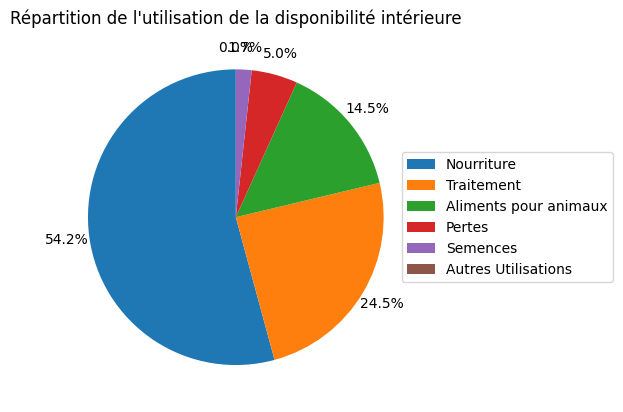

In [ ]:

# Création DataFrame 'utilisation_disponibilite' et traçage graphique
utilisation_disponibilite = (dispo[['Aliments pour animaux', 'Autres Utilisations', 'Nourriture', 'Pertes', 'Semences', 'Traitement']]
    .sum()
    .sort_values(ascending = False)
)
plt.pie(utilisation_disponibilite.values, autopct = '%.1f%%', pctdistance = 1.15, startangle = 90)
plt.title('Répartition de l\'utilisation de la disponibilité intérieure')
plt.legend(utilisation_disponibilite.index, loc = 7, bbox_to_anchor=(1.54, 0.5))
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.5 - Utilisation des céréales</h3>
</div>

In [ ]:
#Création d'une liste avec toutes les variables
liste_cereales = [ 
    "Blé", "Riz(Eq Blanchi)", "Orge", "Mais", "Seigle", "Avoine", "Millet", "Sorgho", "Céréales", "Autres"]


In [ ]:
#Création d'un dataframe avec les informations uniquement pour ces céréales
utilisation_cereales = dispo.loc[dispo['Produit'].isin(liste_cereales), ['Nourriture', 'Aliments pour animaux', 'Disponibilité intérieure']]
utilisation_cereales.head(5)

,Nourriture,Aliments pour animaux,Disponibilité intérieure
7,4.895000e+09,0.0,5.992000e+09
34,1.200000e+07,0.0,1.300000e+07
40,8.900000e+07,360000000.0,5.240000e+08
67,4.000000e+07,8000000.0,4.900000e+07
72,3.174000e+09,37000000.0,3.316000e+09


In [ ]:
#Affichage de la proportion d'alimentation animale dispo inter
total_nourriture = utilisation_cereales['Nourriture'].sum() 
total_aliments = utilisation_cereales['Aliments pour animaux'].sum()
total_interieures = utilisation_cereales['Disponibilité intérieure'].sum()
pourcentage_animale = (total_aliments / total_interieures ) * 100
print(f"{pourcentage_animale:.2f}%",
      f"de la disponibilité intérieure est utilisée pour l'alimentation animale" )



28.98% de la disponibilité intérieure est utilisée pour l'alimentation animale


In [ ]:
#Affichage de la proportion d'alimentation humaine
# Calculate the percentage
pourcentage_humaine = (total_nourriture / total_interieures) * 100

# Print the result formatted as a percentage
print(f"{pourcentage_humaine:.2f}%", 
      'de la disponibilité intérieure est utilisée pour les humains')


54.98% de la disponibilité intérieure est utilisée pour les humains


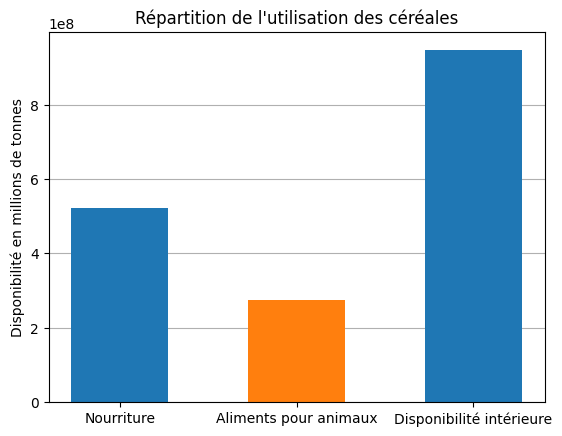

In [ ]:
# Traçage graphique
taille_barres = (utilisation_cereales.sum() / 1000)
nom_barres = utilisation_cereales.columns
position_barres = np.arange(len(taille_barres))

plt.bar(position_barres, taille_barres, width = 0.55, color = ['tab:blue', 'tab:orange'], zorder = 2)
plt.grid(axis = 'y')
plt.xticks(position_barres, nom_barres)
plt.ylabel('Disponibilité en millions de tonnes')
plt.title('Répartition de l\'utilisation des céréales')
plt.show()


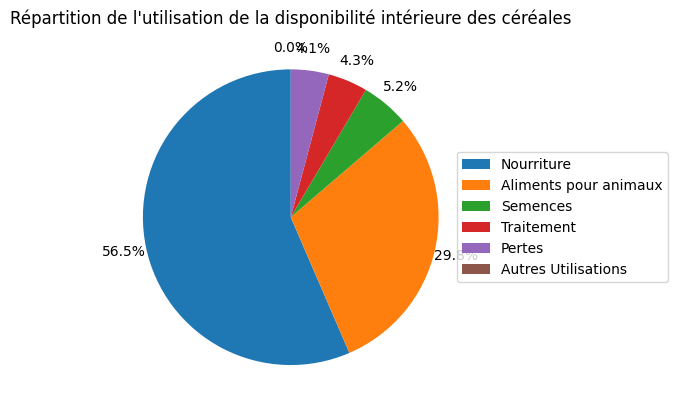

In [ ]:

# Création DataFrame 'utilisation_disponibilite_cereales' et traçage graphique
utilisation_disponibilite_cereales = dispo.loc[
    dispo['Produit'].isin(liste_cereales),
    ['Aliments pour animaux', 'Autres Utilisations', 'Nourriture', 'Pertes', 'Semences', 'Traitement']
].sum().sort_values(ascending = False)

plt.pie(utilisation_disponibilite_cereales.values, autopct = '%.1f%%', pctdistance = 1.15, startangle = 90)
plt.title('Répartition de l\'utilisation de la disponibilité intérieure des céréales')
plt.legend(utilisation_disponibilite_cereales.index, loc = 7, bbox_to_anchor=(1.54, 0.5))
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.6 - Pays avec la proportion de personnes sous-alimentée la plus forte en 2017</h3>
</div>

In [ ]:
#Création de la colonne proportion par pays
population_sous_nutrition['taux_sous_nutrition'] = (
    population_sous_nutrition['sous_nutrition'] / population_sous_nutrition['population']
)

In [ ]:
#affichage après trie des 10 pires pays
top_10 = population_sous_nutrition.nlargest(10, 'taux_sous_nutrition')
top_10= top_10.reset_index(drop=(True))
top_10.index = top_10.index + 1
top_10.style.format({'taux_sous_nutrition': '{:.1%}'})

,Zone,Année_x,population,Année_y,sous_nutrition,taux_sous_nutrition
1,Haïti,2017,10982366.000000,2016-2018,5300000.000000,48.3%
2,République populaire démocratique de Corée,2017,25429825.000000,2016-2018,12000000.000000,47.2%
3,Madagascar,2017,25570512.000000,2016-2018,10500000.000000,41.1%
4,Libéria,2017,4702226.000000,2016-2018,1800000.000000,38.3%
5,Lesotho,2017,2091534.000000,2016-2018,800000.000000,38.2%
6,Tchad,2017,15016753.000000,2016-2018,5700000.000000,38.0%
7,Rwanda,2017,11980961.000000,2016-2018,4200000.000000,35.1%
8,Mozambique,2017,28649018.000000,2016-2018,9400000.000000,32.8%
9,Timor-Leste,2017,1243258.000000,2016-2018,400000.000000,32.2%
10,Afghanistan,2017,36296113.000000,2016-2018,10500000.000000,28.9%


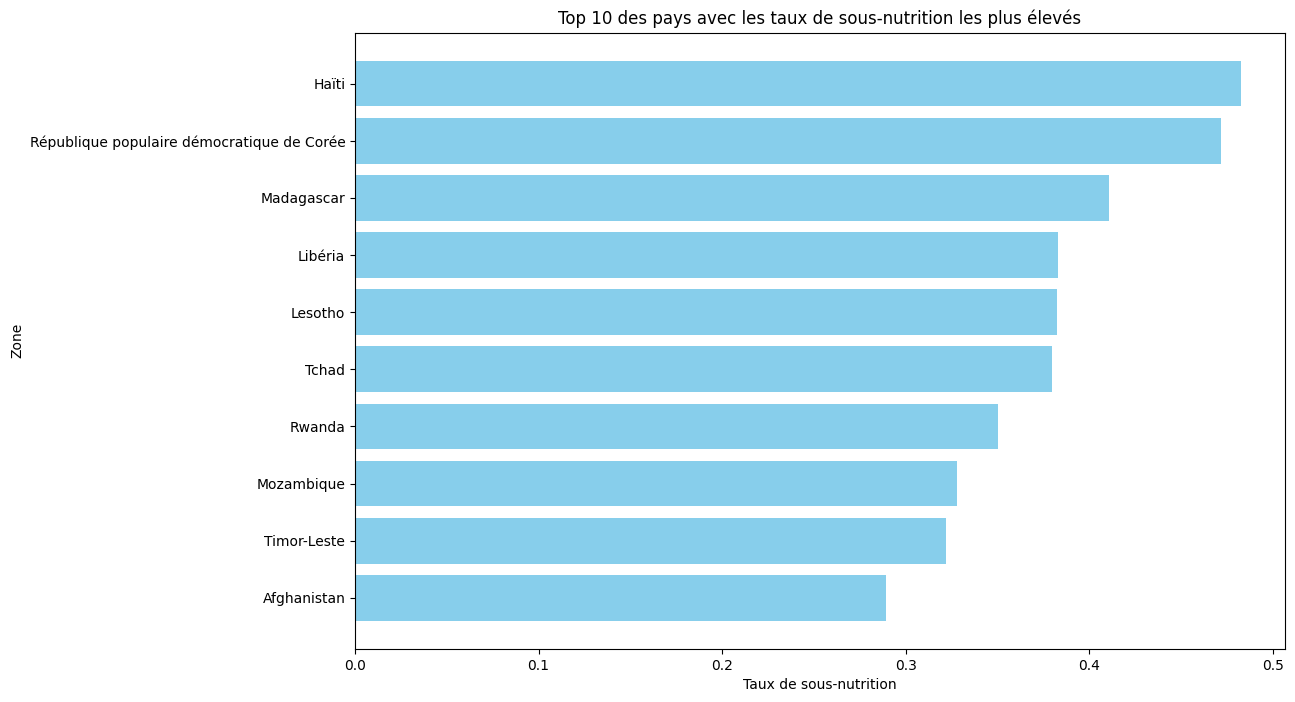

In [ ]:
plt.figure(figsize=(12, 8)) 
plt.barh(top_10['Zone'], top_10['taux_sous_nutrition'], color='skyblue') 
plt.xlabel('Taux de sous-nutrition') 
plt.ylabel('Zone') 
plt.title('Top 10 des pays avec les taux de sous-nutrition les plus élevés') 
plt.gca().invert_yaxis() 
plt.show()


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.7 - Pays qui ont le plus bénéficié d'aide alimentaire depuis 2013</h3>
</div>

In [ ]:
#calcul du total de l'aide alimentaire par pays
aide_total=aide.groupby('Zone')['Valeur'].sum()

In [ ]:
#affichage après trie des 10 pays qui ont bénéficié le plus de l'aide alimentaire
aide_total.nlargest(10)


Zone
République arabe syrienne           1858943000
Éthiopie                            1381294000
Yémen                               1206484000
Soudan du Sud                        695248000
Soudan                               669784000
Kenya                                552836000
Bangladesh                           348188000
Somalie                              292678000
République démocratique du Congo     288502000
Niger                                276344000
Name: Valeur, dtype: int64

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.8 - Evolution des 5 pays qui ont le plus bénéficiés de l'aide alimentaire entre 2013 et 2016</h3>
</div>

In [ ]:
aide.head(5)

,Zone,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682000
1,Afghanistan,2014,Autres non-céréales,335000
2,Afghanistan,2013,Blé et Farin,39224000
3,Afghanistan,2014,Blé et Farin,15160000
4,Afghanistan,2013,Céréales,40504000


In [ ]:
#Création d'un dataframe avec la zone, l'année et l'aide alimentaire puis groupby sur zone et année 
aide_alimentaire_zone_année = aide.groupby(['Zone', 'Année'])['Valeur'].sum().reset_index()
aide_alimentaire_zone_année.head(5)

,Zone,Année,Valeur
0,Afghanistan,2013,128238000
1,Afghanistan,2014,57214000
2,Algérie,2013,35234000
3,Algérie,2014,18980000
4,Algérie,2015,17424000


In [ ]:
#Création d'une liste contenant les 5 pays qui ont le plus bénéficiées de l'aide alimentaire
aide_alimentaire_zone = aide.groupby(['Zone'])['Valeur'].sum().reset_index()
aide_alimentaire_top5 = aide_alimentaire_zone.nlargest(5, 'Valeur').reset_index()

In [ ]:
#On filtre sur le dataframe avec notre liste
# Filter for the years 2013 to 2016
aide_alimentaire_zone_13_16 = aide_alimentaire_zone_année.loc[aide_alimentaire_zone_année['Année'].isin([2013, 2014, 2015, 2016]), ['Zone', 'Année', 'Valeur']]

# Filter for the top 5 zones
aide_alimentaire_top5_13_16 = aide_alimentaire_zone_13_16.loc[aide_alimentaire_zone_13_16['Zone'].isin(aide_alimentaire_top5['Zone']), ['Zone', 'Année', 'Valeur']]



In [ ]:
# Affichage des pays avec l'aide alimentaire par année
aide_alimentaire_top5_13_16.head(25)


,Zone,Année,Valeur
157,République arabe syrienne,2013,563566000
158,République arabe syrienne,2014,651870000
159,République arabe syrienne,2015,524949000
160,République arabe syrienne,2016,118558000
189,Soudan,2013,330230000
190,Soudan,2014,321904000
191,Soudan,2015,17650000
192,Soudan du Sud,2013,196330000
193,Soudan du Sud,2014,450610000
194,Soudan du Sud,2015,48308000


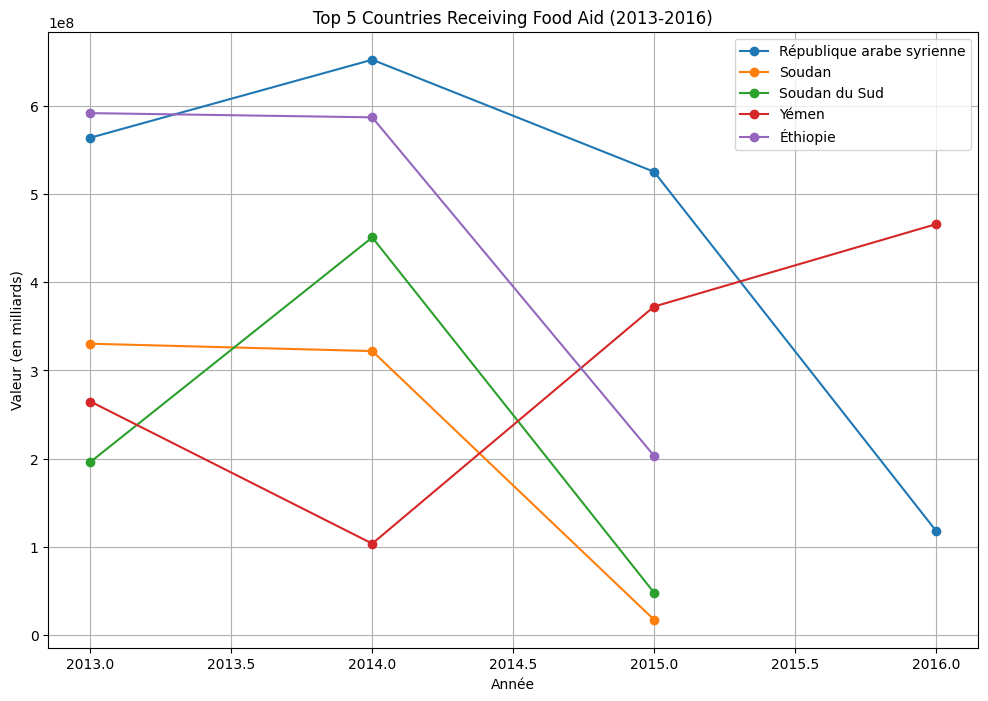

In [ ]:
plt.figure(figsize=(12, 8))
for zone in aide_alimentaire_top5_13_16['Zone'].unique():
    zone_data = aide_alimentaire_top5_13_16[aide_alimentaire_top5_13_16['Zone'] == zone]
    plt.plot(zone_data['Année'], zone_data['Valeur'], marker='o', label=zone)

plt.xlabel('Année')
plt.ylabel('Valeur (en milliards)')
plt.title('Top 5 Countries Receiving Food Aid (2013-2016)')
plt.legend()
plt.grid(True)
plt.show()


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.9 - Pays avec le moins de disponibilité par habitant</h3>
</div>

In [ ]:
dispo.head(3)

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Calcul de la disponibilité en kcal par personne par jour par pays
dispo_zone = (dispo
    .groupby(['Zone'])[['Disponibilité alimentaire (Kcal/personne/jour)']]
    .sum(numeric_only = True)
    .reset_index()
)
dispo_zone.head(3)

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,2087.0
1,Afrique du Sud,3020.0
2,Albanie,3188.0


In [ ]:
#Affichage des 10 pays qui ont le moins de dispo alimentaire par personne 
(dispo_zone.loc[dispo_zone['Disponibilité alimentaire (Kcal/personne/jour)'] != 0, ['Zone','Disponibilité alimentaire (Kcal/personne/jour)']]
).nsmallest(10, 'Disponibilité alimentaire (Kcal/personne/jour)')


,Zone,Disponibilité alimentaire (Kcal/personne/jour)
128,République centrafricaine,1879.0
166,Zambie,1924.0
91,Madagascar,2056.0
0,Afghanistan,2087.0
65,Haïti,2089.0
133,République populaire démocratique de Corée,2093.0
151,Tchad,2109.0
167,Zimbabwe,2113.0
114,Ouganda,2126.0
154,Timor-Leste,2129.0


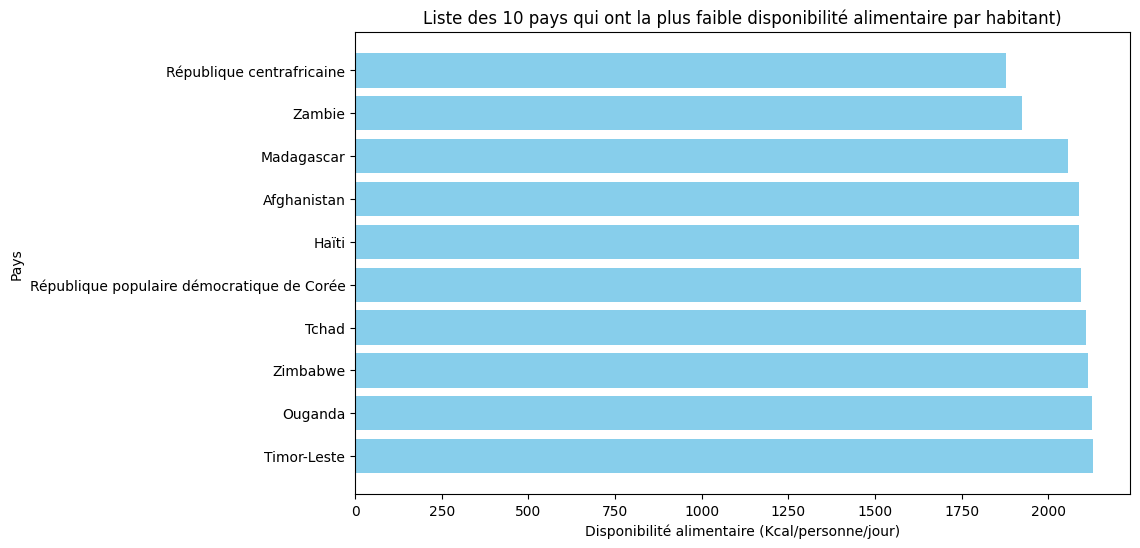

In [ ]:
lowest_dispo = dispo_zone.loc[dispo_zone['Disponibilité alimentaire (Kcal/personne/jour)'] != 0, ['Zone', 'Disponibilité alimentaire (Kcal/personne/jour)']].nsmallest(10, 'Disponibilité alimentaire (Kcal/personne/jour)')
#plot the data
plt.figure(figsize=(10, 6)) 
plt.barh(lowest_dispo['Zone'], lowest_dispo['Disponibilité alimentaire (Kcal/personne/jour)'], color='skyblue') 
plt.xlabel('Disponibilité alimentaire (Kcal/personne/jour)') 
plt.ylabel('Pays') 
plt.title('Liste des 10 pays qui ont la plus faible disponibilité alimentaire par habitant)') 
plt.gca().invert_yaxis()
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.10 - Pays avec le plus de disponibilité par habitant</h3>
</div>

In [ ]:
#Affichage des 10 pays qui ont le plus de dispo alimentaire par personne 
dispo_zone[['Zone','Disponibilité alimentaire (Kcal/personne/jour)']].nlargest(10, 'Disponibilité alimentaire (Kcal/personne/jour)')

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
11,Autriche,3770.0
16,Belgique,3737.0
159,Turquie,3708.0
171,États-Unis d'Amérique,3682.0
74,Israël,3610.0
72,Irlande,3602.0
75,Italie,3578.0
89,Luxembourg,3540.0
168,Égypte,3518.0
4,Allemagne,3503.0


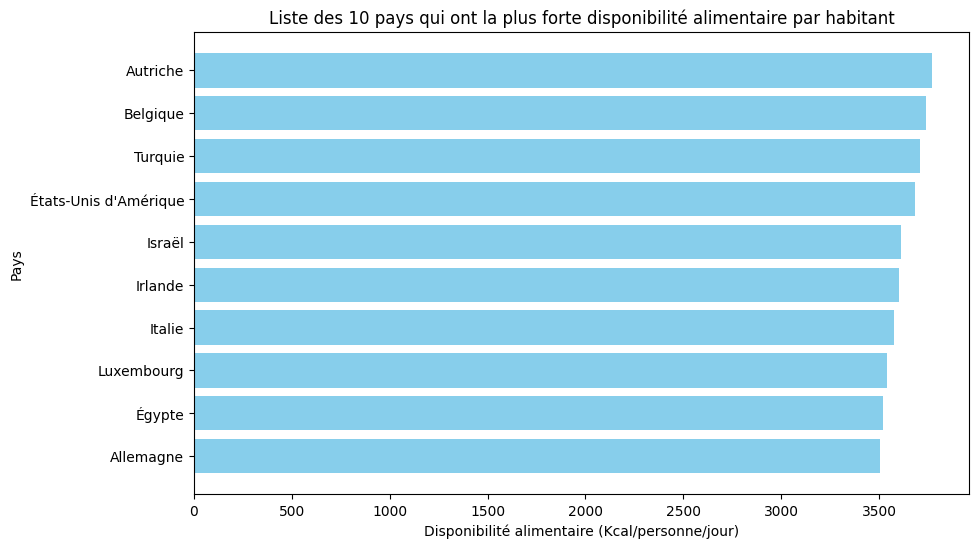

In [ ]:
highest_dispo = dispo_zone[['Zone', 'Disponibilité alimentaire (Kcal/personne/jour)']].nlargest(10, 'Disponibilité alimentaire (Kcal/personne/jour)') 
# Plot the data 
plt.figure(figsize=(10, 6)) 
plt.barh(highest_dispo['Zone'], highest_dispo['Disponibilité alimentaire (Kcal/personne/jour)'], color='skyblue') 
plt.xlabel('Disponibilité alimentaire (Kcal/personne/jour)') 
plt.ylabel('Pays')
plt.title('Liste des 10 pays qui ont la plus forte disponibilité alimentaire par habitant') 
plt.gca().invert_yaxis() 
# Invert y-axis to have the highest value at the top 
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.11 - Exemple de la Thaïlande pour le Manioc</h3>
</div>

In [ ]:
#création d'un dataframe avec uniquement la Thaïlande 
dispo_thailand= dispo[dispo['Zone'] == 'Thaïlande']
sous_thailand = sous[sous['Zone'] == 'Thaïlande']
population_thailand= population[population['Zone'] == 'Thaïlande']
aide_thailand= aide[aide['Zone'] == 'Thaïlande'] 

dispo_thailand.head()



,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
13759,Thaïlande,Abats Comestible,animale,0.0,0.0,3.0,1.11,0.09,0.56,74000000.0,5.000000e+06,33000000.0,75000000.0,0.0,4.500000e+07,0.0,0.0,0.0
13760,Thaïlande,"Agrumes, Autres",vegetale,0.0,0.0,0.0,0.09,0.00,0.00,8000000.0,6.000000e+06,2000000.0,6000000.0,0.0,1.200000e+07,0.0,2000000.0,0.0
13761,Thaïlande,"Alcool, non Comestible",vegetale,0.0,358.0,0.0,0.00,0.00,0.00,358000000.0,1.100000e+08,21000000.0,0.0,0.0,4.470000e+08,0.0,0.0,0.0
13762,Thaïlande,Aliments pour enfants,vegetale,0.0,0.0,2.0,0.18,0.01,0.08,12000000.0,7.000000e+06,19000000.0,12000000.0,0.0,0.000000e+00,0.0,0.0,0.0
13763,Thaïlande,Ananas,vegetale,0.0,0.0,10.0,10.02,0.04,0.08,782000000.0,1.449000e+09,9000000.0,671000000.0,110000000.0,2.209000e+09,0.0,0.0,13.0


In [ ]:
# Calcul de la sous-nutrition en Thaïlande
sous_nutrition_thailand = sous_thailand[sous_thailand['Année'] == '2016-2018'][['sous_nutrition']]

# Reset the index to start from 0
sous_nutrition_thailand = sous_nutrition_thailand.reset_index(drop=True)

# Calculate the total population for 2017
population_2017 = population_thailand.loc[population_thailand['Année'] == 2017, 'population'].sum()

# Calculate the percentage of sous-nutrition
pourcentage_sous_thailand = (sous_nutrition_thailand['sous_nutrition'] / population_2017) * 100

# Print the 'sous_nutrition' column and the percentage
print(sous_nutrition_thailand['sous_nutrition'].to_string(index=False), 'personnes')
print(f"ou {pourcentage_sous_thailand.iloc[0]:.2f}% de la population totale")





6200000.0 personnes
ou 8.96% de la population totale


In [ ]:
# Filter for manioc products 
exportation_production = dispo_thailand[['Zone','Origine', 'Produit','Disponibilité alimentaire (Kcal/personne/jour)', 'Exportations - Quantité', 'Production', 'Nourriture']].copy()
manioc_thailand = exportation_production.loc[(exportation_production['Produit'].str.contains('manioc', case=False))] 
# Calculate the percentage for each row and print it 
total_production = 0 
total_exportation = 0 
for index, row in manioc_thailand.iterrows(): pourcentage_manioc_export = row['Exportations - Quantité'] / row['Production'] * 100 
total_production += row['Production'] 
total_exportation += row['Exportations - Quantité'] 
print(f"Pour la {row['Zone']}, le pourcentage Manioc Export: {pourcentage_manioc_export:.2f}%") 
# Print total production and exportation
print(f"\nTotal production de manioc: {total_production}") 
print(f"Total exportation de manioc: {total_exportation}")


Pour la Thaïlande, le pourcentage Manioc Export: 83.41%

Total production de manioc: 30228000000.0
Total exportation de manioc: 25214000000.0


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 6 - Analyse complémentaires</h2>
</div>

In [ ]:
#Rajouter en dessous toutes les analyses complémtaires suite à la demande de mélanie :
#"et toutes les infos que tu trouverais utiles pour mettre en relief les pays qui semblent être 
#le plus en difficulté au niveau alimentaire"